Optimal Solution: 
x:  0.0
y:  5.0
Objective value:  10.0


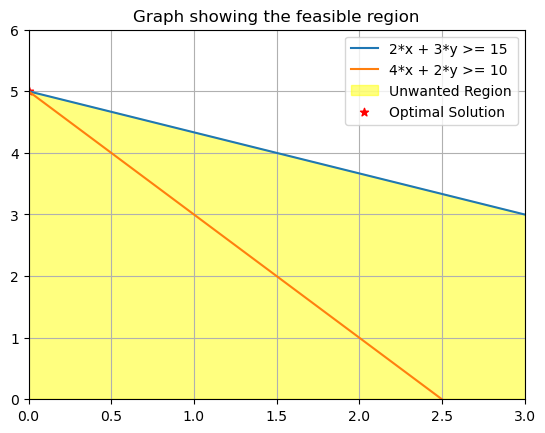

In [1]:
from pulp import *
import matplotlib.pyplot as plt
import numpy as np

model = LpProblem(name = "Energy_consumption", sense=LpMinimize)

x = LpVariable("x", 0)
y = LpVariable("y", 0)

model += 3*x + 2*y

model += 2*x + 3*y >= 15
model += 4*x + 2*y >= 10

model.solve()

optimal_x = x.varValue
optimal_y = y.varValue
optimal_value = model.objective.value()

print("Optimal Solution: ")
print("x: ", optimal_x)
print("y: ", optimal_y)
print("Objective value: ", optimal_value)


x_values = np.linspace(0, 10, 100)
y1_values = (15-2*x_values)/3
y2_values = (10-4*x_values)/2

plt.plot(x_values, y1_values, label=2*x + 3*y >= 15)
plt.plot(x_values, y2_values, label=4*x + 2*y >= 10)

# plt.fill_between(x_values, np.maximum(y1_values,y2_values), 0, where=(y1_values<=y2_values), color="orange")
plt.fill_between(x_values, np.maximum(y1_values,y2_values), 0, where=(y1_values>=y2_values), color="yellow", alpha=0.5, label='Unwanted Region')


plt.title("Graph showing the feasible region")
plt.xlim(0,3)
plt.ylim(0,6)
plt.grid(True)
plt.scatter(optimal_x, optimal_y, color="red",marker='*', label="Optimal Solution")
plt.legend()
plt.show()